## Observations and Insights

## Dependencies and starter code

In [ ]:
# 3 Observations of the data

# 1.  Infubinol seems to be the least effective treatment out of the 4 that we evaluated
# 2.  There is a strong correlation between an increase in weight and the tumor volume
# 3.  Capomulin and Ramicane both seemed to be very effective treatments 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
# Combine/merge the data into a single dataset - using a left join because we want to tie all of the mice data to a study

combined_mice_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Set the index (not really necessary) to 'Drug Regimen' and then groupby 'Drug Regimen'
###  combined_mice_index = combined_mice_df.set_index('Drug Regimen')

drug_groups = combined_mice_df.groupby('Drug Regimen')


In [4]:
# Count gives a count by groups and gives all the dataframe columns
drug_groups.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


## Summary statistics

In [5]:
# Calculate mean, median, variance, std dev, SEM and put into a summary statistics table using the
# .agg method

drug_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar plots

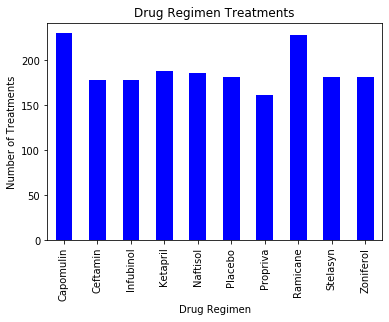

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using PANDAS

drug_groups['Mouse ID'].count().plot(kind='bar', facecolor='blue') 

plt.title("Drug Regimen Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")

plt.show()
plt.tight_layout()

In [7]:
mouse_count = drug_groups["Mouse ID"].count()
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

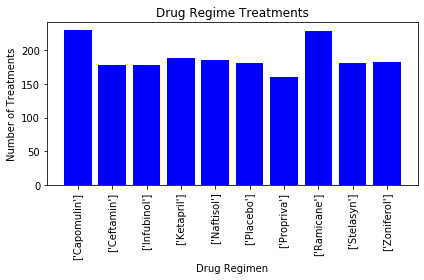

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using PYPLOT

# len will give the # of rows/treatment regimines/groups in the dataframe
x_axis = np.arange(len(drug_groups))
mouse_count = drug_groups["Mouse ID"].count()

## plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_count, facecolor = 'blue', alpha=1.0, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_groups["Drug Regimen"].unique(), rotation='vertical')

## plt.xlim(0.75, len(x_axis))
### plt.ylim(0,(drug_groups["Mouse ID"]))
### plt.ylim(0,(drug_groups["Mouse ID"].count()))

plt.title("Drug Regime Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")

plt.tight_layout()
plt.show()

## Pie plots

In [11]:
# Group the data by gender
gender_groups = combined_mice_df.groupby('Sex')
gender_groups.count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


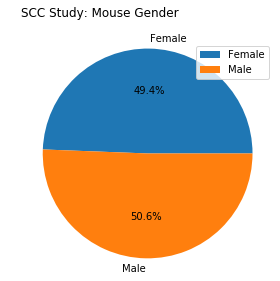

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using PANDAS .plot

gender_pie = gender_groups.count().plot.pie(y='Mouse ID', figsize=(4,4), autopct='%1.1f%%')

plt.title(label='SCC Study: Mouse Gender',loc='left',y=1.08)
plt.legend(loc="best")
plt.axis("equal")
gender_pie.set_ylabel(" ")
plt.tight_layout()

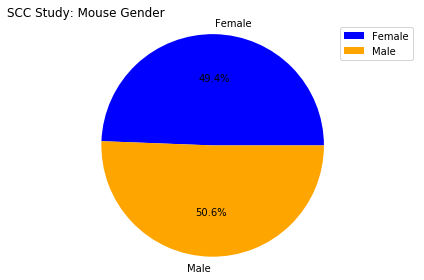

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

values = gender_groups['Mouse ID'].count()
genders = ['Female', 'Male']
colors = ['blue', 'orange']
explode = [0.1,0]

plt.pie(values, labels=genders, colors=colors, autopct="%1.1f%%")


plt.title(label='SCC Study: Mouse Gender',loc='left')
plt.legend(loc="best")
gender_pie.set_ylabel("Gender")
plt.axis("equal")
plt.tight_layout()


## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Set the index to 'drug regimen' and create a reduced dataframes containing only the 4 promising drugs

combined_mice_index = combined_mice_df.set_index('Drug Regimen')
combined_mice_index.head(10)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
Ramicane,k403,Male,21,16,25,33.464577,1
Ramicane,k403,Male,21,16,30,31.099498,1
Ramicane,k403,Male,21,16,35,26.546993,1
Ramicane,k403,Male,21,16,40,24.365505,1


In [15]:
# Create a dataframe with just 1 drug.  
# Sort by timepoint and drop all but the last timepoint for each mouse to get the final tumor volume
# Do this 4 times for all 4 drugs.

drug1_df = combined_mice_index.loc[["Capomulin"]]
drug1_df.sort_values("Timepoint", inplace=True)
drug1_max_timepoints_df = drug1_df.drop_duplicates(subset="Mouse ID", keep='last')
drug1_max_timepoints_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1_1 = drug1_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.25)
q3_1 = drug1_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.75)
IQR_1 = q3_1 - q1_1

print("Capomulin Results:")
print(f"The lower quartile of SCC treatments is: {q1_1}")
print(f"The upper quartile of SCC treatments is: {q3_1}")
print(f"The interquartile range of SCC treatments is: {IQR_1}")

lower_bound = q1_1 - (1.5 * IQR_1)
upper_bound = q3_1 + (1.5 * IQR_1)

print("")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin Results:
The lower quartile of SCC treatments is: 32.37735684
The upper quartile of SCC treatments is: 40.1592203
The interquartile range of SCC treatments is: 7.781863460000004

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Drug 2

drug2_df = combined_mice_index.loc[["Ramicane"]]
drug2_df.sort_values("Timepoint", inplace=True)
drug2_max_timepoints_df = drug2_df.drop_duplicates(subset="Mouse ID", keep='last')
drug2_max_timepoints_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1_2 = drug2_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.25)
q3_2 = drug2_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.75)
IQR_2 = q3_2 - q1_2

print("Ramicane Results:")
print(f"The lower quartile of SCC treatments is: {q1_2}")
print(f"The upper quartile of SCC treatments is: {q3_2}")
print(f"The interquartile range of SCC treatments is: {IQR_2}")

lower_bound = q1_2 - (1.5 * IQR_2)
upper_bound = q3_2 + (1.5 * IQR_2)

print("")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane Results:
The lower quartile of SCC treatments is: 31.56046955
The upper quartile of SCC treatments is: 40.65900627
The interquartile range of SCC treatments is: 9.098536719999998

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
# Drug 3

drug3_df = combined_mice_index.loc[["Infubinol"]]
drug3_df.sort_values("Timepoint", inplace=True)
drug3_max_timepoints_df = drug3_df.drop_duplicates(subset="Mouse ID", keep='last')
drug3_max_timepoints_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1_3 = drug3_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.25)
q3_3 = drug3_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.75)
IQR_3 = q3_3 - q1_3
 
print("Infubinol Results:")
print(f"The lower quartile of SCC treatments is: {q1_3}")
print(f"The upper quartile of SCC treatments is: {q3_3}")
print(f"The interquartile range of SCC treatments is: {IQR_3}")

lower_bound = q1_3 - (1.5 * IQR_3)
upper_bound = q3_3 + (1.5 * IQR_3)

print("")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol Results:
The lower quartile of SCC treatments is: 54.04860769
The upper quartile of SCC treatments is: 65.52574285
The interquartile range of SCC treatments is: 11.477135160000003

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
# Drug 4

drug4_df = combined_mice_index.loc[["Ceftamin"]]
drug4_df.sort_values("Timepoint", inplace=True)
drug4_max_timepoints_df = drug4_df.drop_duplicates(subset="Mouse ID", keep='last')
drug4_max_timepoints_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1_4 = drug4_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.25)
q3_4 = drug4_max_timepoints_df['Tumor Volume (mm3)'].quantile(0.75)
IQR_4 = q3_4 - q1_4

print("Ceftamin Results:")
print(f"The lower quartile of SCC treatments is: {q1_4}")
print(f"The upper quartile of SCC treatments is: {q3_4}")
print(f"The interquartile range of SCC treatments is: {IQR_4}")

lower_bound = q1_4 - (1.5 * IQR_4)
upper_bound = q3_4 + (1.5 * IQR_4)

print("")
print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

Ceftamin Results:
The lower quartile of SCC treatments is: 48.72207785
The upper quartile of SCC treatments is: 64.29983003
The interquartile range of SCC treatments is: 15.577752179999997

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(*args, **kw)>

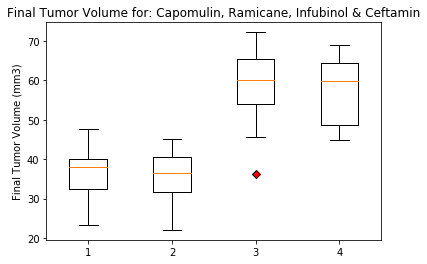

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
red_diamond = dict(markerfacecolor='r', marker='D')
ax1.set_title('Final Tumor Volume for: Capomulin, Ramicane, Infubinol & Ceftamin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
data = [drug1_max_timepoints_df['Tumor Volume (mm3)'], 
        drug2_max_timepoints_df['Tumor Volume (mm3)'], 
        drug3_max_timepoints_df['Tumor Volume (mm3)'],
        drug4_max_timepoints_df['Tumor Volume (mm3)']]

ax1.boxplot(data, showfliers=True, flierprops=red_diamond)
plt.show

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

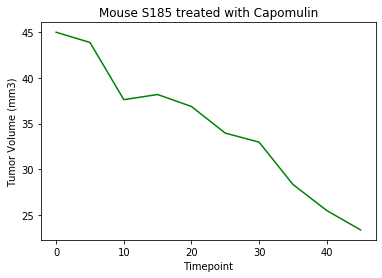

In [22]:
# Generate a line plot of time point versus tumor volume for a specific mouse treated with Capomulin
# drug1_df is just Capomulin

just_one_mouse = drug1_df.loc[drug1_df['Mouse ID'] == "s185"]
timepoint = just_one_mouse['Timepoint']
tumor_vol = just_one_mouse['Tumor Volume (mm3)']

tumor_vol, = plt.plot(timepoint, tumor_vol, color='green')
#plt.legend(handles=[tumor_vol],loc="best")

plt.title('Mouse S185 treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")          

In [39]:
# Generate a scatter plot of AVERAGE mouse weight versus average tumor volume for the Capomulin regimen

drug1_df = combined_mice_index.loc[["Capomulin"]]
drug1_df.reset_index
drug1_df.head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.000000,0
Capomulin,s185,Female,3,17,5,43.878496,0
Capomulin,s185,Female,3,17,10,37.614948,0
Capomulin,s185,Female,3,17,15,38.177232,0
Capomulin,s185,Female,3,17,20,36.866876,0
Capomulin,s185,Female,3,17,25,33.949940,0
Capomulin,s185,Female,3,17,30,32.959671,1
Capomulin,s185,Female,3,17,35,28.328531,1
Capomulin,s185,Female,3,17,40,25.472143,1


In [43]:
#  Group by Mouse id and get the averages in a groupby object

avg_weight_tumor_vol = drug1_df.groupby(['Mouse ID']).mean()
avg_weight_tumor_vol.head(10)


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


Mouse ID
b128    AxesSubplot(0.125,0.125;0.775x0.755)
b742    AxesSubplot(0.125,0.125;0.775x0.755)
f966    AxesSubplot(0.125,0.125;0.775x0.755)
g288    AxesSubplot(0.125,0.125;0.775x0.755)
g316    AxesSubplot(0.125,0.125;0.775x0.755)
i557    AxesSubplot(0.125,0.125;0.775x0.755)
i738    AxesSubplot(0.125,0.125;0.775x0.755)
j119    AxesSubplot(0.125,0.125;0.775x0.755)
j246    AxesSubplot(0.125,0.125;0.775x0.755)
l509    AxesSubplot(0.125,0.125;0.775x0.755)
l897    AxesSubplot(0.125,0.125;0.775x0.755)
m601    AxesSubplot(0.125,0.125;0.775x0.755)
m957    AxesSubplot(0.125,0.125;0.775x0.755)
r157    AxesSubplot(0.125,0.125;0.775x0.755)
r554    AxesSubplot(0.125,0.125;0.775x0.755)
r944    AxesSubplot(0.125,0.125;0.775x0.755)
s185    AxesSubplot(0.125,0.125;0.775x0.755)
s710    AxesSubplot(0.125,0.125;0.775x0.755)
t565    AxesSubplot(0.125,0.125;0.775x0.755)
u364    AxesSubplot(0.125,0.125;0.775x0.755)
v923    AxesSubplot(0.125,0.125;0.775x0.755)
w150    AxesSubplot(0.125,0.125;0.775x0.755)
w

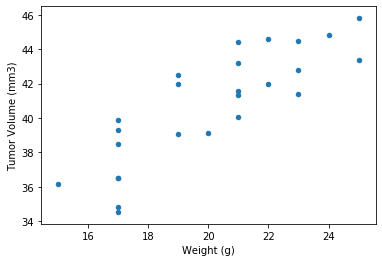

In [42]:
fig, ax = plt.subplots()
avg_weight_tumor_vol.groupby('Mouse ID').plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ax=ax)

NameError: name 'x' is not defined

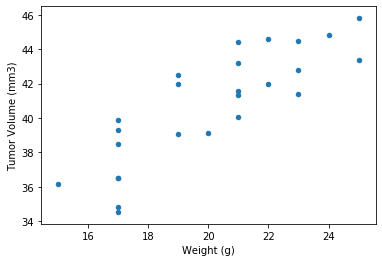

In [50]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor 
# volume for the Capomulin regimen

fig, ax = plt.subplots()
avg_weight_tumor_vol.groupby('Mouse ID').plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ax=ax)
(slope, intercept, rvalue, pvalue, stderr) = st(x,y)
regress_values = x * slope + intercept
line_eq = 'Y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")